## **Netflix_Title**

## **About Data**

### **Data Overview**

**This dataset can be used to analyze the types of content Netflix offers, trends in release years, regional contributions to the catalog, audience-targeted ratings, and genre diversity. This information is valuable for exploring content trends and audience demographics.**

### **Columns Explanation**

1.   **show_id**: Unique identifier for each show
2.   **type**: Type of content, either "Movie" or "TV Show"
3.   **title**: Title of the show.
4.   **director**: Director of the show; has some missing values
5.   **cast**: Cast members of the show; some missing values.
6.   **country**: Country where the show was produced; some missing values.
7.   **date_added**: Date when the show was added to Netflix.
8.   **release_year**: Year the show was originally released.
9.   **rating**: Content rating (e.g., PG-13, TV-MA).
10.  **duration**: Duration of the show (e.g., in minutes for movies or number ofseasons for TV shows).
11.  **listed_in**: Categories or genres associated with the show.
12.  **description**: Brief description of the show.



### Target Variable

* Type: Could serve as a target variable if the goal is to classify content as either a "Movie" or "TV Show."
* Rating or Listed_in: Might also serve as target variables if predicting content rating or genre is of interest.

## **Understand Data**

### **Dataset**

In [103]:
import pandas as pd
df = pd.read_csv("/content/netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Data Analysising

In [104]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [105]:
df.info()
print(f'Dataset contain {df.shape[0]} rows and {df.shape[1]} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
Dataset contain 8807 rows and 12 columns


In [106]:
#datatypes of features
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


## Data Cleaning

In [107]:
#Checking missing values features
missing_values = df.isnull().sum()
print(missing_values [missing_values > 0])

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


In [108]:
(2634/8807)*100

29.908027705234474

In the above data, we can choose to drop the director and cast columns completely as they are not a huge part for us while we visualize the data and they dont add any significant value to our analysis. We are only focused on visualizing this data hence dropping two columns wont be any trouble for us.

In [109]:
df.drop(['director','cast',"show_id"],axis = 1,inplace = True)

showid is the index number we can remove from the dataset

In [110]:
# #Here show id is the index model numbers so we can drop it
# df.drop(columns='show_id',axis=1, inplace=True)

In [111]:
df['rating'].value_counts().unique()

array([3207, 2160,  863,  799,  490,  334,  307,  287,  220,   80,   41,
          6,    3,    1])

We replaced all the Nan values in the country column with United States as Netflix was created in the USA and every show is aired on Netflix US. So instead of dropping the whole column we just replaced the values in it in order to save our data.

In [112]:
df['country'].fillna('United', inplace=True)

<ipython-input-112-c99cee6475e7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('United', inplace=True)


We already have released year for each movie and hence even if we dont have released date,it wont affect our analsis much. Hence we can Drop released date column.

In [113]:
df.drop(['date_added'],axis =1,inplace = True)

In [114]:
df

,type,title,country,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,United,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,United,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,United,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [115]:
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [116]:
df['duration'].value_counts()

,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
90 min,152
94 min,146
...,...
16 min,1
186 min,1
193 min,1


As we can see we only have 4 missing values in our rating column, we can either drop them or replace them. We have TV-MA which is the most common raing and hence we can replace all these nan values with TV-MA.Same in duration only 3 missing value and most common is 1 season we can replace with that data

In [117]:
df['rating'].fillna('TV-MA',inplace=True)
df['duration'].fillna("1 Season",inplace=True)


<ipython-input-117-3d092e3b8762>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna('TV-MA',inplace=True)
<ipython-input-117-3d092e3b8762>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [118]:
df.isnull().sum()

,0
type,0
title,0
country,0
release_year,0
rating,0
duration,0
listed_in,0
description,0


We have now dealt with all of our missing data so lets get started with our data visualization

## **Data Visulation**

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [120]:
df.head()

,type,title,country,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,United,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,United,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<Axes: xlabel='type', ylabel='count'>

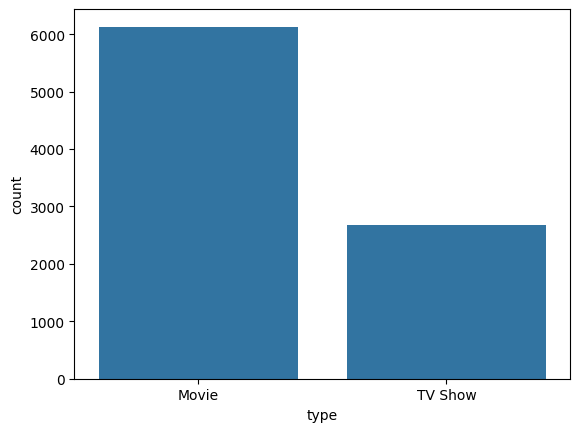

In [121]:
#We can see numbers of movies and tvshows
sns.countplot(x='type',data = df)

Here movies higher than tv shows so people preferred movies

<Axes: xlabel='rating', ylabel='count'>

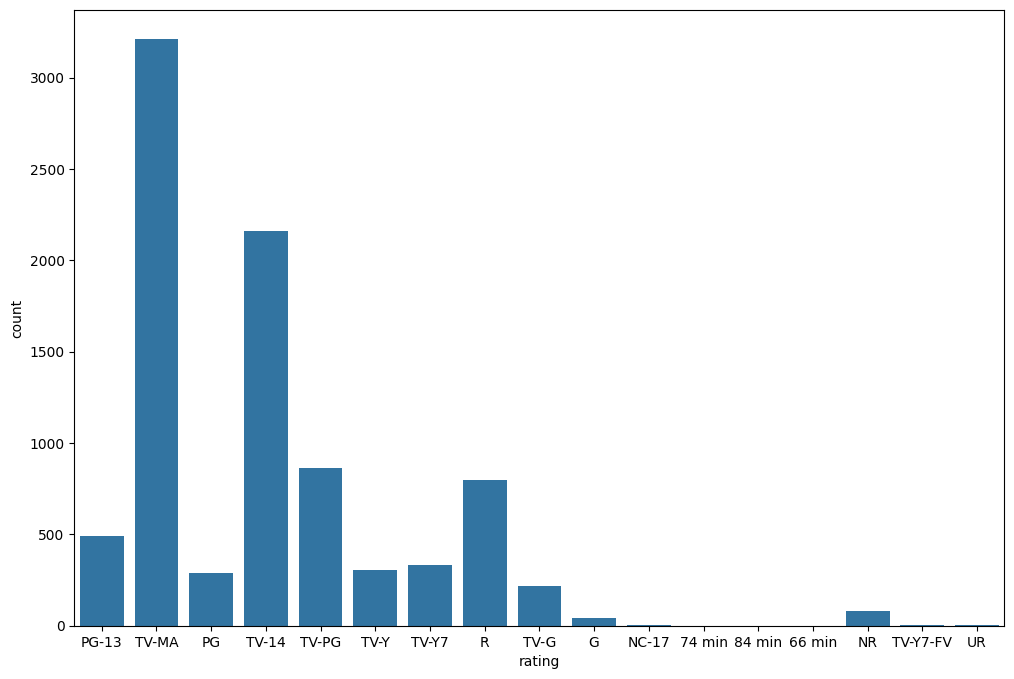

In [122]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df)

<Axes: xlabel='release_year', ylabel='count'>

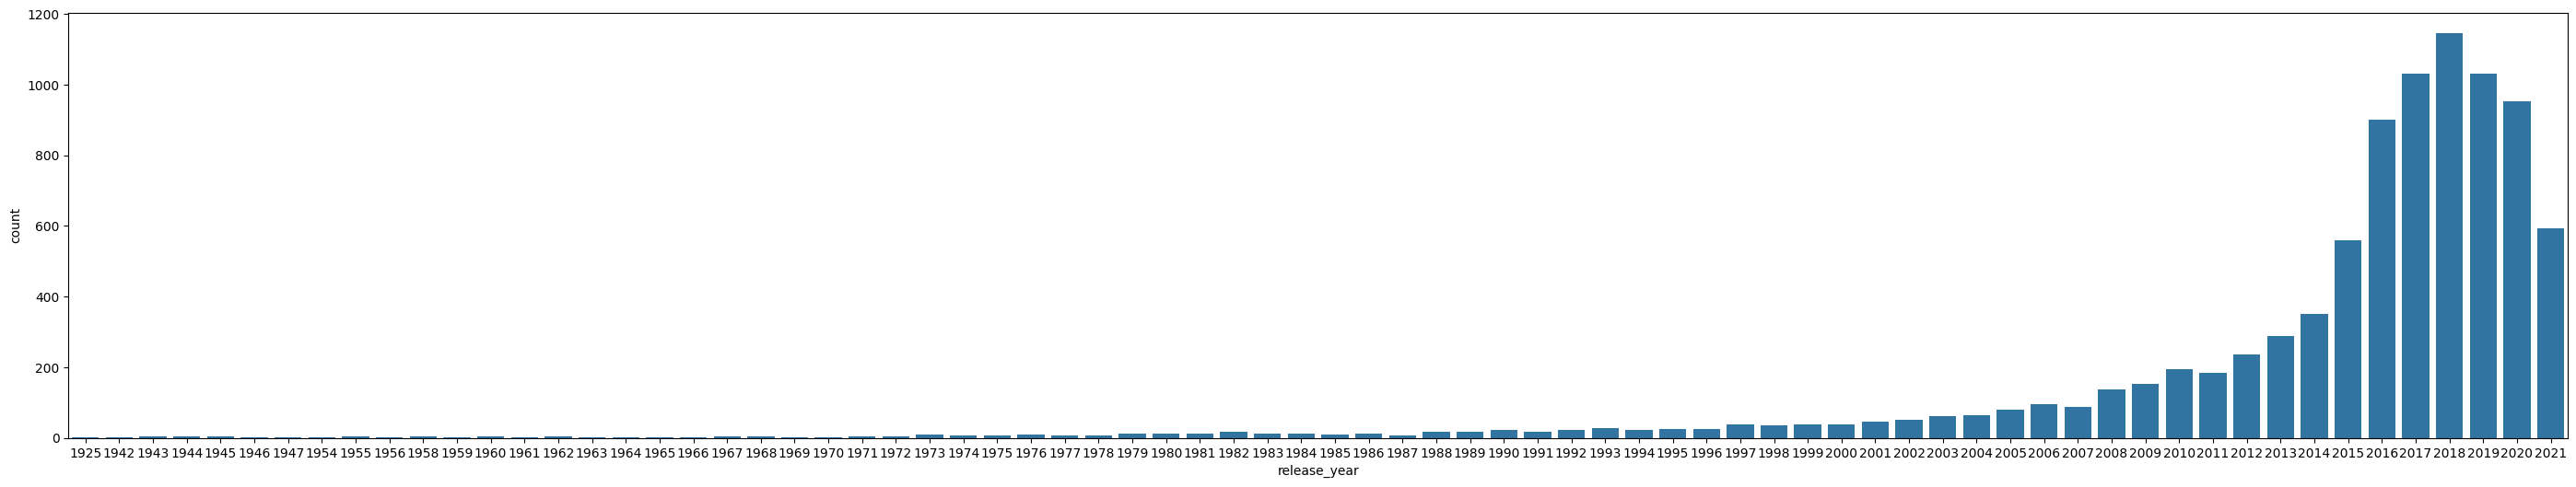

In [123]:
plt.figure(figsize = (35,6))
sns.countplot(x='release_year',data = df)

As we can see most of the Movies and Tv shows on Netflix are Released in the nowadays and very few were released at the past

<Axes: xlabel='rating', ylabel='type'>

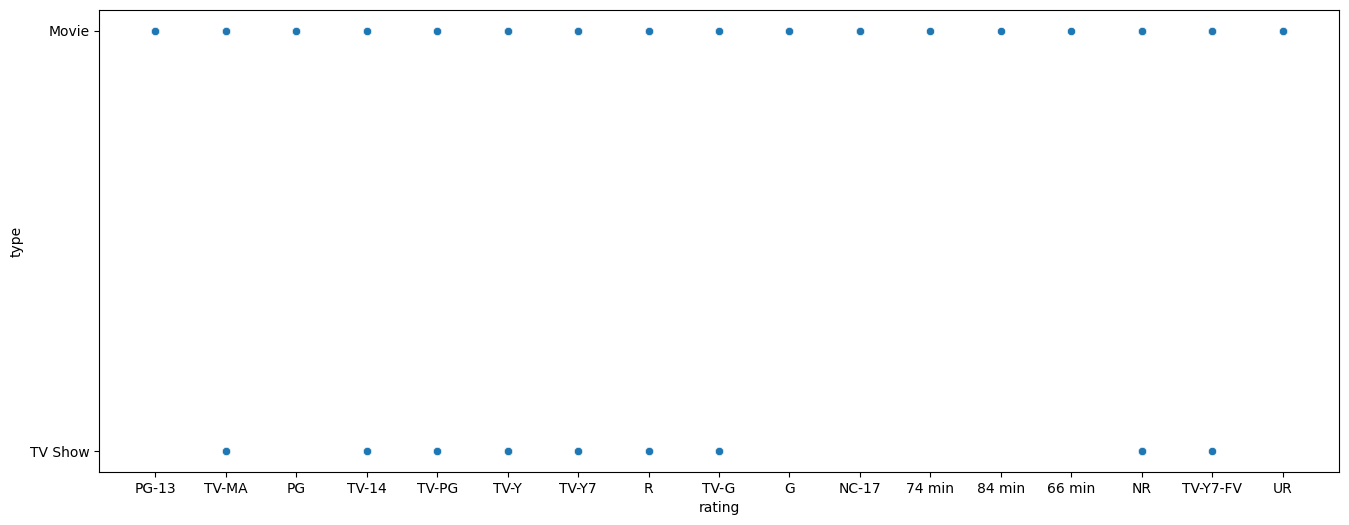

In [124]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='rating',y='type',data = df) #analysing the type, whether its a movie or a movie v/s the rating it has

<Axes: xlabel='rating', ylabel='count'>

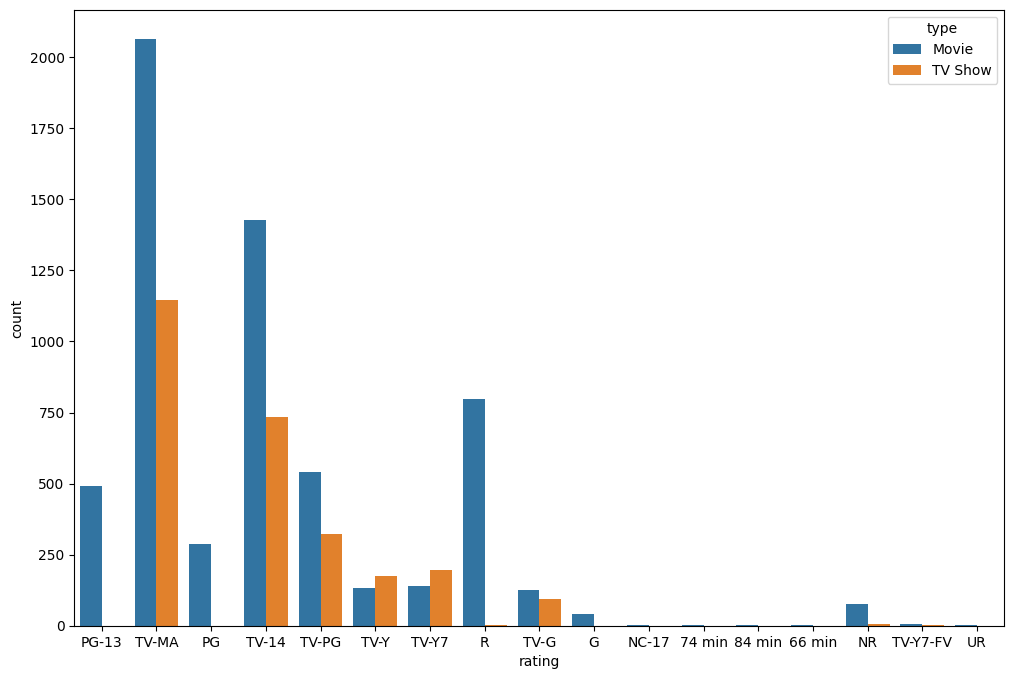

In [125]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df,hue='type')

In [126]:
#countries with the most rated content
country_count=df['country'].value_counts().sort_values(ascending=False)
topcountry=country_count[0:11]
topcountry

,count
country,
United States,2818
India,972
United,831
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124


In [127]:
 #oldest movies available on netflix
old = df.sort_values("release_year", ascending = True) #oldest movies available on netflix
old = old[old['duration'] != ""]
old[['title', "release_year"]][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
7930,San Pietro,1945


## Correlation Analaysis

In [128]:
df.dtypes

,0
type,object
title,object
country,object
release_year,int64
rating,object
duration,object
listed_in,object
description,object


In [129]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['type'] = labelencoder.fit_transform(df['type'])
df['title'] = labelencoder.fit_transform(df['title'])
df['country'] = labelencoder.fit_transform(df['country'])
df['listed_in'] = labelencoder.fit_transform(df['listed_in'])
df['rating']=labelencoder.fit_transform(df['rating'])
df['duration']=labelencoder.fit_transform(df['duration'])
df['description']=labelencoder.fit_transform(df['description'])

In [130]:
df # Displaying whether the data has converted into numeric

,type,title,country,release_year,rating,duration,listed_in,description
0,0,1975,604,2020,7,210,274,2577
1,1,1091,426,2021,11,110,414,1762
2,1,2651,499,2021,11,0,242,7341
3,1,3506,499,2021,11,0,297,3617
4,1,3861,251,2021,11,110,393,4416
...,...,...,...,...,...,...,...,...
8802,0,8770,604,2007,8,70,269,895
8803,1,8773,499,2018,14,110,424,8483
8804,0,8774,604,2009,8,206,207,5228
8805,0,8777,604,2006,6,206,125,3315


In [131]:
import matplotlib.pyplot as plt

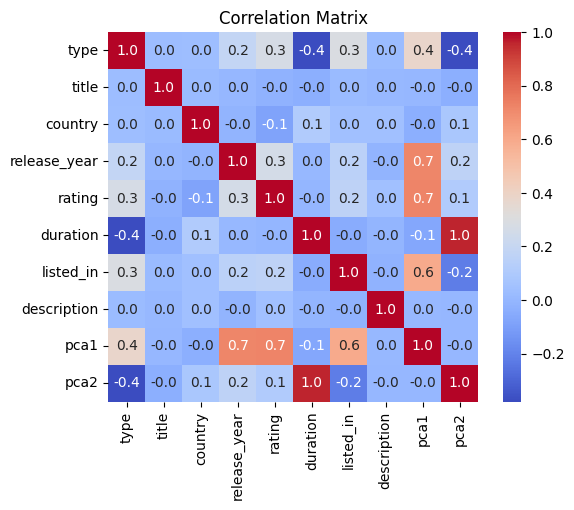

In [155]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of correlation matriDex
#sns.heatmap(corr_matrix, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs))
sns.heatmap(corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0, robust=True,square=True) # 0.01f should be given for float values, d for integers
plt.title('Correlation Matrix')
plt.show()

here we can take **type** as a target variable type doesn't have much coorelation with other

So data like relase_year , rating , duration and listed_in has little correlation but not high

In [133]:
corr_matrix

,type,title,country,release_year,rating,duration,listed_in,description
type,1.000000,0.025439,0.025387,0.181710,0.290497,-0.380911,0.304750,0.021813
title,0.025439,1.000000,0.019912,-0.017802,-0.018155,-0.029824,0.017286,0.008079
country,0.025387,0.019912,1.000000,-0.042899,-0.111650,0.101260,0.036314,0.044383
release_year,0.181710,-0.017802,-0.042899,1.000000,0.249401,-0.005371,0.197579,-0.018933
rating,0.290497,-0.018155,-0.111650,0.249401,1.000000,-0.019552,0.198433,0.038055
duration,-0.380911,-0.029824,0.101260,-0.005371,-0.019552,1.000000,-0.049286,-0.006134
listed_in,0.304750,0.017286,0.036314,0.197579,0.198433,-0.049286,1.000000,-0.018920
description,0.021813,0.008079,0.044383,-0.018933,0.038055,-0.006134,-0.018920,1.000000


## **Outlier Detection**

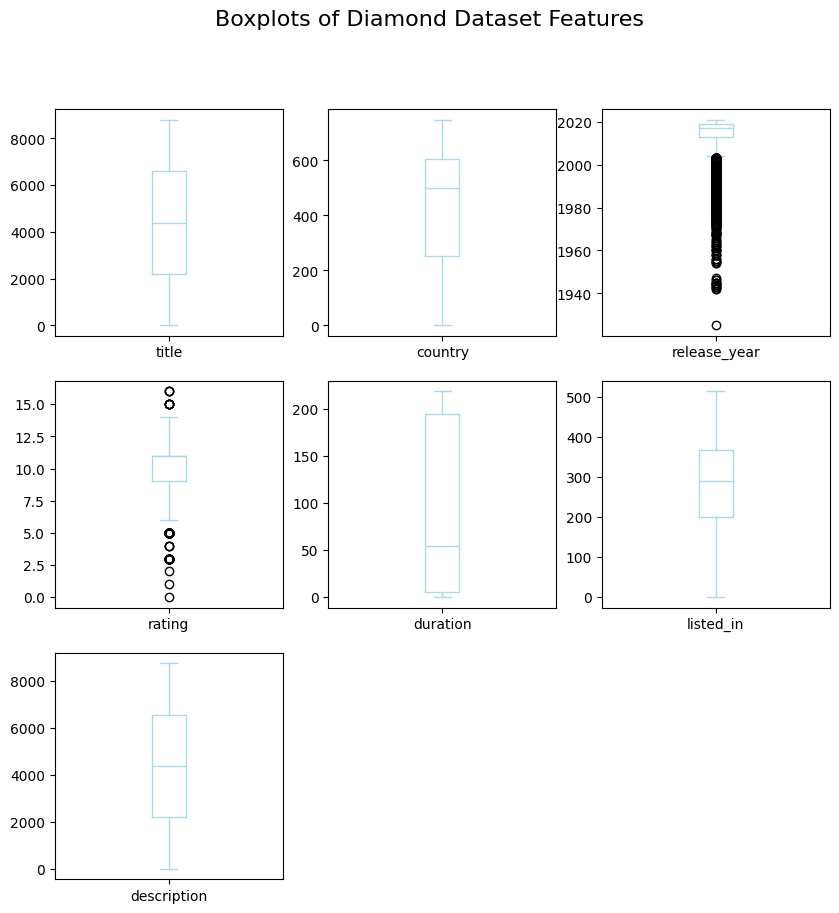

In [134]:
df1=df.drop(columns='type',axis=1)
df1.plot(kind='box', subplots=True, layout=(3,3), figsize=(10,10),
color='lightblue')
plt.suptitle('Boxplots of Diamond Dataset Features', fontsize=16)
plt.show()

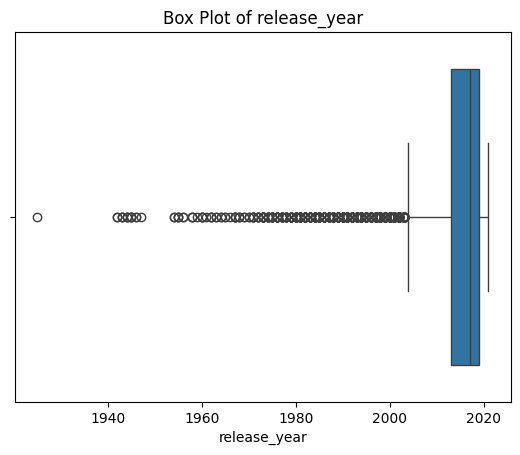

In [135]:
sns.boxplot(x=df['release_year'])
plt.title('Box Plot of release_year')
plt.show()

In [136]:
from scipy import stats
z_scores = np.abs(stats.zscore(df['release_year']))
outliers = df[z_scores > 3]
print(f'Number of outliers in release_year: {outliers.shape[0]}')

Number of outliers in release_year: 217


 We can remove 217 outliers from a dataset of 8,807 data points. This would leave you with 8,590 points, which should still provide a large enough sample size for most analyses, assuming the remaining data is representative of the population

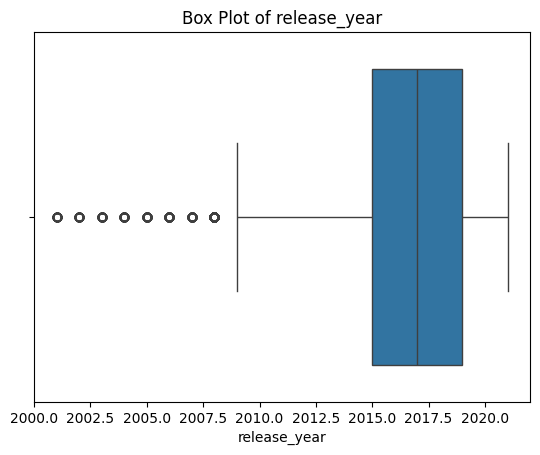

In [137]:
import pandas as pd

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Filter out the outliers
df = df[(df['release_year'] >= lower_bound) & (df['release_year'] <= upper_bound)]

sns.boxplot(x=df['release_year'])
plt.title('Box Plot of release_year')
plt.show()

In [138]:
z_scores = np.abs(stats.zscore(df['rating']))
outliers = df[z_scores > 3]
print(f'Number of outliers in rating: {outliers.shape[0]}')

Number of outliers in rating: 31


Also there is 31 ouliers in rating that we badly effect the output also we can remove that then it won't affect the output almost most of rateing values are concentrated at the center less is at the ends

In [139]:
import pandas as pd

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

# Filter out the outliers
df = df[(df['rating'] >= lower_bound) & (df['rating'] <= upper_bound)]

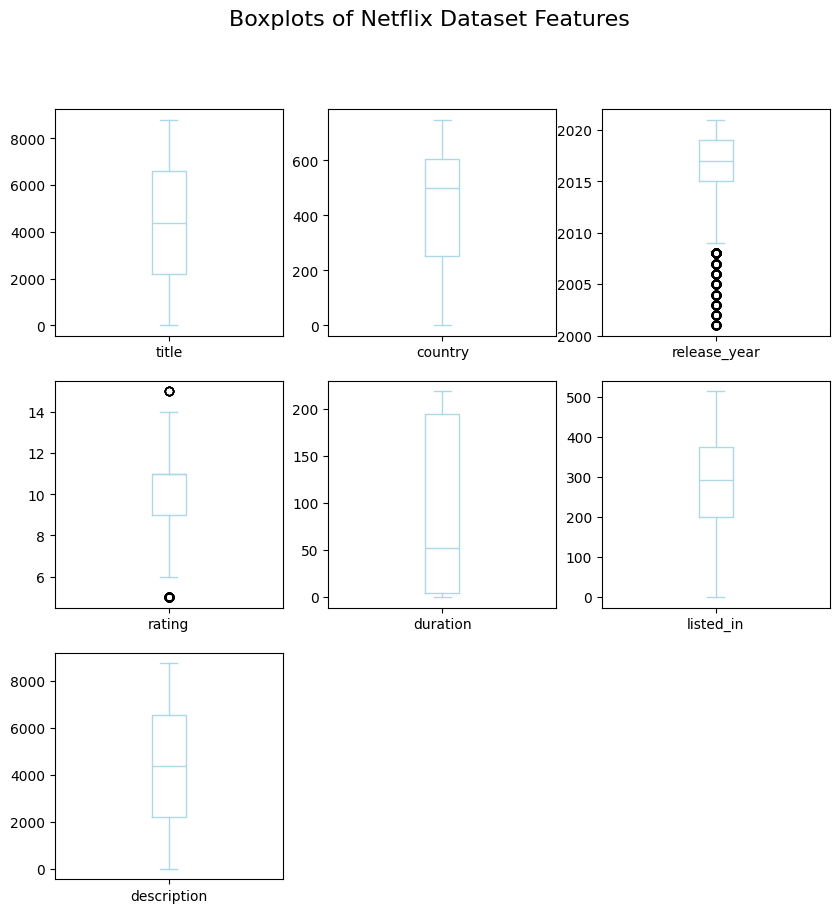

In [140]:
df5=df.drop(columns='type',axis=1)
df5.plot(kind='box', subplots=True, layout=(3,3), figsize=(10,10),
color='lightblue')
plt.suptitle('Boxplots of Netflix Dataset Features', fontsize=16)
plt.show()

## Dimentionality Reduction

In [141]:
df

,type,title,country,release_year,rating,duration,listed_in,description
0,0,1975,604,2020,7,210,274,2577
1,1,1091,426,2021,11,110,414,1762
2,1,2651,499,2021,11,0,242,7341
3,1,3506,499,2021,11,0,297,3617
4,1,3861,251,2021,11,110,393,4416
...,...,...,...,...,...,...,...,...
8802,0,8770,604,2007,8,70,269,895
8803,1,8773,499,2018,14,110,424,8483
8804,0,8774,604,2009,8,206,207,5228
8805,0,8777,604,2006,6,206,125,3315


Here we must standardize the features before doing PCA then we can apply PCA after that features

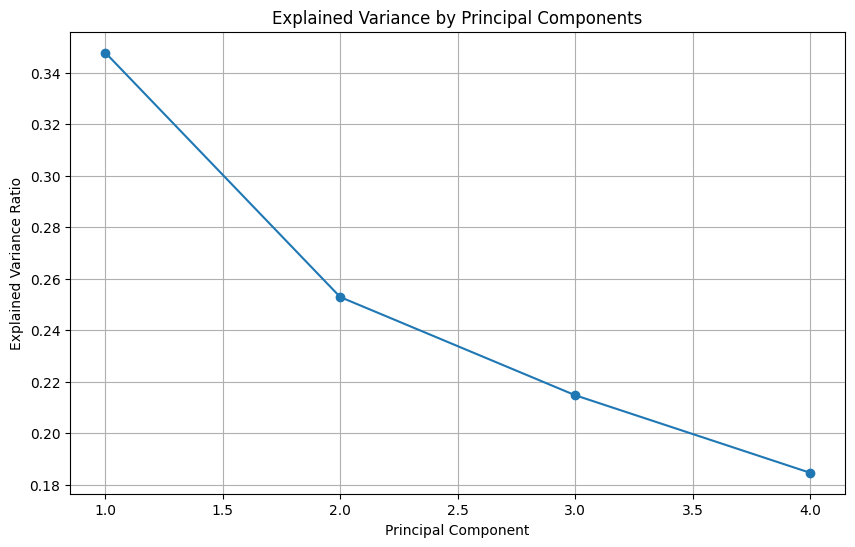

In [142]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = ["release_year","rating","duration","listed_in"]

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
#print(X)

# Apply PCA
pca = PCA()
pca.fit(X)

# Explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(features) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

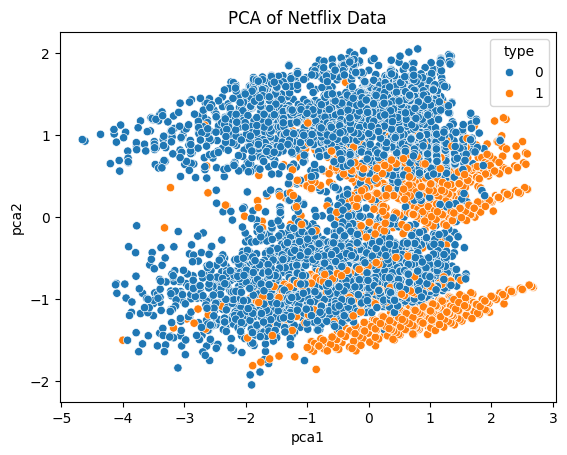

In [143]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = ["release_year","rating","duration","listed_in"]
X = StandardScaler().fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', hue='type', data=df)
plt.title('PCA of Netflix Data')
plt.show()

Here yellow refers to Tv shows and Blue refers to Movie

In [144]:
X

array([[ 0.93803218, -1.68537613,  1.31857314, -0.03113753],
       [ 1.17563537,  0.46852788,  0.1882461 ,  1.05136179],
       [ 1.17563537,  0.46852788, -1.05511364, -0.27856595],
       ...,
       [-1.67560294, -1.14690013,  1.27336005, -0.54919078],
       [-2.38841252, -2.22385213,  1.27336005, -1.18322609],
       [-0.24998378, -0.60842413, -0.87426131,  0.38639792]])

In [145]:
df

,type,title,country,release_year,rating,duration,listed_in,description,pca1,pca2
0,0,1975,604,2020,7,210,274,2577,-0.559732,1.234136
1,1,1091,426,2021,11,110,414,1762,1.516865,0.192412
2,1,2651,499,2021,11,0,242,7341,0.923297,-0.704664
3,1,3506,499,2021,11,0,297,3617,1.136559,-0.797804
4,1,3861,251,2021,11,110,393,4416,1.435437,0.227975
...,...,...,...,...,...,...,...,...,...,...
8802,0,8770,604,2007,8,70,269,895,-2.028229,-0.712932
8803,1,8773,499,2018,14,110,424,8483,2.115581,0.237328
8804,0,8774,604,2009,8,206,207,5228,-2.071146,0.938579
8805,0,8777,604,2006,6,206,125,3315,-3.482863,0.842998


## Data Scleing

We are scalering the fixed feature that has much more cooleration with the target variable `type`.The features are also in different range so standardtion  and also minmax scaler

In [146]:
from sklearn.preprocessing import MinMaxScaler

# Standardization (mean = 0, std = 1)
scaler = StandardScaler()
df[["release_year","rating","duration","listed_in"]] = scaler.fit_transform(df[["release_year","rating","duration","listed_in"]])

#Normalization (scaling to 0-1 range)
minmax_scaler = MinMaxScaler()
df[["release_year","rating","duration","listed_in"]] = minmax_scaler.fit_transform(df[["release_year","rating","duration","listed_in"]])

In [147]:
df

,type,title,country,release_year,rating,duration,listed_in,description,pca1,pca2
0,0,1975,604,0.95,0.2,0.958904,0.534113,2577,-0.559732,1.234136
1,1,1091,426,1.00,0.6,0.502283,0.807018,1762,1.516865,0.192412
2,1,2651,499,1.00,0.6,0.000000,0.471735,7341,0.923297,-0.704664
3,1,3506,499,1.00,0.6,0.000000,0.578947,3617,1.136559,-0.797804
4,1,3861,251,1.00,0.6,0.502283,0.766082,4416,1.435437,0.227975
...,...,...,...,...,...,...,...,...,...,...
8802,0,8770,604,0.30,0.3,0.319635,0.524366,895,-2.028229,-0.712932
8803,1,8773,499,0.85,0.9,0.502283,0.826511,8483,2.115581,0.237328
8804,0,8774,604,0.40,0.3,0.940639,0.403509,5228,-2.071146,0.938579
8805,0,8777,604,0.25,0.1,0.940639,0.243665,3315,-3.482863,0.842998


## Initial Modeleling and testing

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [149]:
# Load dataset
X = df[["release_year","rating","duration","listed_in"]]
y = df['type']

In [150]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
X_train

,release_year,rating,duration,listed_in
485,1.00,0.4,0.945205,1.000000
3722,0.90,0.7,0.502283,0.834308
8185,0.30,0.6,1.000000,0.643275
6907,0.45,0.4,0.214612,0.389864
1599,0.85,0.6,0.986301,0.389864
...,...,...,...,...
5994,0.90,0.6,0.958904,0.680312
5413,0.80,0.6,0.000000,0.970760
5629,0.75,0.4,0.178082,0.635478
953,0.75,0.3,0.972603,0.670565


In [152]:
y_train

,type
485,0
3722,1
8185,0
6907,0
1599,0
...,...
5994,0
5413,1
5629,0
953,0


Here we use Logistic Regression for training model Because it is Classification

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Train a baseline logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.78


In [154]:
# Summarize key findings
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation with Survival': df.corr()['type'].sort_values(ascending=False)
}

print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")

# Prepare final dataset for modeling
final_df = df[["release_year","rating","duration","listed_in","type"]]
print("\nFinal Dataset\n")
final_df

EDA Summary:
Dataset Shape: (8214, 10)
Missing Values: 0
Correlation with Survival: type            1.000000
pca1            0.379289
listed_in       0.292469
rating          0.271982
release_year    0.181999
country         0.031204
title           0.026748
description     0.021734
pca2           -0.378575
duration       -0.393626
Name: type, dtype: float64

Final Dataset



,release_year,rating,duration,listed_in,type
0,0.95,0.2,0.958904,0.534113,0
1,1.00,0.6,0.502283,0.807018,1
2,1.00,0.6,0.000000,0.471735,1
3,1.00,0.6,0.000000,0.578947,1
4,1.00,0.6,0.502283,0.766082,1
...,...,...,...,...,...
8802,0.30,0.3,0.319635,0.524366,0
8803,0.85,0.9,0.502283,0.826511,1
8804,0.40,0.3,0.940639,0.403509,0
8805,0.25,0.1,0.940639,0.243665,0


### Conclusion

The EDA highlights valuable correlations between the target variable `type` and several features, offering insights that can guide predictive modeling:

1. **Key Predictive Features**: `pca1`, `pca2`, `listed_in`, `rating`, and `duration` show notable correlations with `type`. Specifically, `pca1` and `listed_in` have moderate positive correlations, while `pca2` and `duration` show moderate negative correlations. These features could serve as strong predictors for the target variable in modeling tasks.

2. **Moderate Impact of Release Year**: The `release_year` attribute has a mild positive correlation with `type`, suggesting some historical trend in the content types across different years.

3. **Limited Influence of Certain Attributes**: Features like `country`, `title`, and `description` have weak correlations with `type`, indicating they might contribute less value to predictive modeling for this target.

4. **Data Completeness**: With no missing values in the dataset, it is well-prepared for further analysis, minimizing preprocessing needs.

These findings can guide feature selection and engineering in building a model to predict `type`. For more robust insights, further analysis could involve examining these relationships with advanced techniques or exploring interactions between the most correlated features.